In [0]:
%pip install requests

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
%pip install openpyxl

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyspark.sql import Window
from pyspark.sql.functions import to_date
from pyspark.sql.functions import last_day
from pyspark.sql.functions import year
from pyspark.sql.functions import sum, avg, mean, stddev, variance, count, max, min, sqrt
from pyspark.sql.functions import col, isnan
from pyspark.sql.functions import when
from pyspark.sql.functions import dayofweek, date_format
from pyspark.sql.functions import concat_ws
from pyspark.sql.functions import col, last
from pyspark.sql.functions import datediff

### Q 1.1.1.

In [0]:
# Step 1: Importing the Retail_Data_Transactions dataset.
# File location and type
file_location = "/FileStore/tables/Retail_Data_Transactions.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
txn = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

txn.show(5)

+-----------+----------+-----------+
|customer_id|trans_date|tran_amount|
+-----------+----------+-----------+
|     CS5295| 11-Feb-13|         35|
|     CS4768| 15-Mar-15|         39|
|     CS2122| 26-Feb-13|         52|
|     CS1217| 16-Nov-11|         99|
|     CS1850| 20-Nov-13|         78|
+-----------+----------+-----------+
only showing top 5 rows



In [0]:
# Making the table accessible by all users and in every cluster.
permanent_table_name = "Retail_Data_Transactions_csv"

# txn.write.format("parquet").saveAsTable(permanent_table_name)

In [0]:
# Step 2: Identifying the number of rows of the dataset.
print(f"There are {txn.count()} rows in this dataset")

There are 125000 rows in this dataset


#### There are 12500 rows in this dataset.

### Q 1.1.2.

In [0]:
# Creating a new column 'txn_date' from 'trans_date' with pd.to datetime.
txn = txn.withColumn("txn_date", to_date(txn["trans_date"], "dd-MMM-yy"))
txn.show(5)

+-----------+----------+-----------+----------+
|customer_id|trans_date|tran_amount|  txn_date|
+-----------+----------+-----------+----------+
|     CS5295| 11-Feb-13|         35|2013-02-11|
|     CS4768| 15-Mar-15|         39|2015-03-15|
|     CS2122| 26-Feb-13|         52|2013-02-26|
|     CS1217| 16-Nov-11|         99|2011-11-16|
|     CS1850| 20-Nov-13|         78|2013-11-20|
+-----------+----------+-----------+----------+
only showing top 5 rows



In [0]:
# Dropping the 'trans_date' column.
txn = txn.drop("trans_date")
# Showing the first few rows of the DataFrame to verify the change.
txn.show(5)

+-----------+-----------+----------+
|customer_id|tran_amount|  txn_date|
+-----------+-----------+----------+
|     CS5295|         35|2013-02-11|
|     CS4768|         39|2015-03-15|
|     CS2122|         52|2013-02-26|
|     CS1217|         99|2011-11-16|
|     CS1850|         78|2013-11-20|
+-----------+-----------+----------+
only showing top 5 rows



### Q 1.1.3.

In [0]:
# Calculating the min and max of 'txn_date'.
txn_min_max = txn.agg(min("txn_date")\
    .alias("min_txn_date"), max("txn_date")\
        .alias("max_txn_date")).collect()[0]
# Extracting the min and max values.
txn_min = txn_min_max["min_txn_date"]
txn_max = txn_min_max["max_txn_date"]
# Printing the results.
print(f"min txn_date: {txn_min}\nmax txn_date: {txn_max}")

min txn_date: 2011-05-16
max txn_date: 2015-03-16


#### Answer:
- The min()  of column 'txn date' is 2011-05-16 and the max() is 2015-03-16

### Q 1.1.4.

In [0]:
# Creating the 'ME_DT' column as the last day of the month for 'txn_date'
txn = txn.withColumn("ME_DT", last_day("txn_date"))
# Showing the first few rows of the DataFrame to verify the change.
txn.show(5)

+-----------+-----------+----------+----------+
|customer_id|tran_amount|  txn_date|     ME_DT|
+-----------+-----------+----------+----------+
|     CS5295|         35|2013-02-11|2013-02-28|
|     CS4768|         39|2015-03-15|2015-03-31|
|     CS2122|         52|2013-02-26|2013-02-28|
|     CS1217|         99|2011-11-16|2011-11-30|
|     CS1850|         78|2013-11-20|2013-11-30|
+-----------+-----------+----------+----------+
only showing top 5 rows



### Q 1.1.5.

In [0]:
# Creating the 'YEAR' column by extracting the year from 'txn_date'.
txn = txn.withColumn("YEAR", year("txn_date"))
# Viewing rows 55 to 60 of the DataFrame to verify the change.
txn.show(60) 

+-----------+-----------+----------+----------+----+
|customer_id|tran_amount|  txn_date|     ME_DT|YEAR|
+-----------+-----------+----------+----------+----+
|     CS5295|         35|2013-02-11|2013-02-28|2013|
|     CS4768|         39|2015-03-15|2015-03-31|2015|
|     CS2122|         52|2013-02-26|2013-02-28|2013|
|     CS1217|         99|2011-11-16|2011-11-30|2011|
|     CS1850|         78|2013-11-20|2013-11-30|2013|
|     CS5539|         81|2014-03-26|2014-03-31|2014|
|     CS2724|         93|2012-02-06|2012-02-29|2012|
|     CS5902|         89|2015-01-30|2015-01-31|2015|
|     CS6040|         76|2013-01-08|2013-01-31|2013|
|     CS3802|         75|2013-08-20|2013-08-31|2013|
|     CS3494|         94|2013-07-02|2013-07-31|2013|
|     CS3780|         80|2013-03-25|2013-03-31|2013|
|     CS1171|         59|2012-11-03|2012-11-30|2012|
|     CS2892|         43|2013-05-12|2013-05-31|2013|
|     CS5552|         78|2014-12-29|2014-12-31|2014|
|     CS6043|         98|2014-01-15|2014-01-31

### Q 1.2.1.

In [0]:
# Grouping by 'customer_id' and 'YEAR', then performing aggregations.
clnt_annual_aggregations = txn.groupBy("customer_id", "YEAR") \
                            .agg(sum("tran_amount").alias("ann_txn_amt_sum"),
                                mean("tran_amount").alias("ann_txn_amt_ave"),
                                stddev("tran_amount").alias("ann_txn_amt_std"),
                                variance("tran_amount").alias("ann_txn_amt_var"),
                                (stddev("tran_amount") / sqrt(count("tran_amount"))).alias("ann_txn_amt_sem"),
                                max("tran_amount").alias("ann_txn_amt_max"),
                                min("tran_amount").alias("ann_txn_amt_min"),
                                count("tran_amount").alias("ann_txn_amt_cnt")) \
                            .orderBy("customer_id", "YEAR")
clnt_annual_aggregations.show(5)

+-----------+----+---------------+-----------------+------------------+------------------+------------------+---------------+---------------+---------------+
|customer_id|YEAR|ann_txn_amt_sum|  ann_txn_amt_ave|   ann_txn_amt_std|   ann_txn_amt_var|   ann_txn_amt_sem|ann_txn_amt_max|ann_txn_amt_min|ann_txn_amt_cnt|
+-----------+----+---------------+-----------------+------------------+------------------+------------------+---------------+---------------+---------------+
|     CS1112|2011|            212|70.66666666666667| 22.03028218914441|485.33333333333337|12.719189352225943|             96|             56|              3|
|     CS1112|2012|            337|             67.4|12.720062892926277|             161.8| 5.688585061331157|             81|             52|              5|
|     CS1112|2013|            212|70.66666666666667| 34.50120770833006|1190.3333333333333| 19.91928155777155|            105|             36|              3|
|     CS1112|2014|            212|70.66666666666667|

### Q 1.2.2.

#### Comment:
- PySpark does not have built-in plotting capabilities, so libraries like Matplotlib must be used for visualization and this requries the table to be converted to pandas dataframe first.

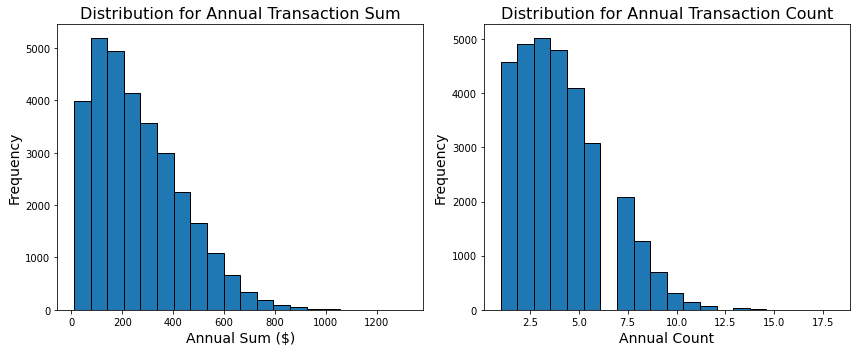

In [0]:
# Converting the PySpark DataFrame to a Pandas DataFrame for visualization.
clnt_annual_aggregations_pd = clnt_annual_aggregations.toPandas()

# Plotting the histogram of the sum and count in clnt_annual_aggregations.
fig = plt.figure(figsize=(12, 5))
# Visualizing the distribution for the Annual Transaction Total.
sub1 = fig.add_subplot(121)
# Using 20 bins to capture the spread of the values more.
plt.hist(clnt_annual_aggregations_pd["ann_txn_amt_sum"], bins=20, edgecolor='black')
sub1.set_title("Distribution for Annual Transaction Sum", fontsize=16)
plt.xlabel("Annual Sum ($)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
# Visualizing the distribution for the Annual Transaction Count.
sub2 = fig.add_subplot(122)
plt.hist(clnt_annual_aggregations_pd["ann_txn_amt_cnt"], bins=20, edgecolor='black')
sub2.set_title("Distribution for Annual Transaction Count", fontsize=16)
plt.xlabel("Annual Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

### Q 1.2.3.

In [0]:
# Pivoting the DataFrame with avg as the aggregation function for all attributes.
clnt_annual_aggregations_pivot = clnt_annual_aggregations \
    .groupBy("customer_id") \
    .pivot("YEAR").agg(
    avg("ann_txn_amt_sum").alias("ann_txn_amt_sum"),
    avg("ann_txn_amt_ave").alias("ann_txn_amt_ave"),
    avg("ann_txn_amt_cnt").alias("ann_txn_amt_cnt"),
    avg("ann_txn_amt_std").alias("ann_txn_amt_std"),
    avg("ann_txn_amt_var").alias("ann_txn_amt_var"),
    avg("ann_txn_amt_sem").alias("ann_txn_amt_sem"),
    avg("ann_txn_amt_max").alias("ann_txn_amt_max"),
    avg("ann_txn_amt_min").alias("ann_txn_amt_min")) \
    .orderBy("customer_id")
clnt_annual_aggregations_pivot.show(5)

+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|customer_id|2011_ann_txn_amt_sum|2011_ann_txn_amt_ave|2011_ann_txn_amt_cnt|2011_ann_txn_amt_std|2011_ann_txn_amt_var|2011_ann_txn_amt_sem|2011_an

In [0]:
# Defining the desired column order.
years = ["2011", "2012", "2013", "2014", "2015"]
attributes = ["ann_txn_amt_ave", "ann_txn_amt_cnt", "ann_txn_amt_sum", "ann_txn_amt_std", 
              "ann_txn_amt_var", "ann_txn_amt_sem", "ann_txn_amt_max", "ann_txn_amt_min"]
# Creating a list of columns in the desired order: attribute_Year.
new_columns = ["customer_id"]
for attribute in attributes:
    for year in years:
        new_columns.append(f"{attribute}_{year}")
# Renaming columns from Year_attribute (the default) to attribute_Year.
for year in years:
    for attribute in attributes:
        old_column_name = f"{year}_{attribute}"  
        new_column_name = f"{attribute}_{year}"  
        clnt_annual_aggregations_pivot = clnt_annual_aggregations_pivot.withColumnRenamed(old_column_name, new_column_name)
# Reordering the columns to match the desired sequence.
clnt_annual_aggregations_pivot = clnt_annual_aggregations_pivot.select(new_columns)
clnt_annual_aggregations_pivot.show(5)

+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|customer_id|ann_txn_amt_ave_2011|ann_txn_amt_ave_2012|ann_txn_amt_ave_2013|ann_txn_amt_ave_2014|ann_txn_amt_ave_2015|ann_txn_amt_cnt_2011|ann_txn

In [0]:
# Observing the number of columns excluding customer id.
print(f"Number of columns in the data: {len(clnt_annual_aggregations_pivot.columns) - 1}")

Number of columns in the data: 40


#### Answer:
- There are 40 columns in this pivoted table because the year is set as the columns and there are 5 years, the 8 annual aggregations have values for all 5 years. Therefore, _5 years * 8 aggregations = 40 columns_.


In [0]:
# Creating a condition to check for Null values in any column.
condition = None
for column_name in clnt_annual_aggregations_pivot.columns:
    if condition is None:
        condition = isnan(col(column_name)) | col(column_name).isNull()
    else:
        condition = condition | isnan(col(column_name)) | col(column_name).isNull()
# Filtering rows with Null values.
rows_with_nan = clnt_annual_aggregations_pivot.filter(condition)
# Printing the resnumber of Null rows.
print(f"Total number of rows with null values in the pivoted table: {rows_with_nan.count()}")

Total number of rows with null values in the pivoted table: 5682


In [0]:
# Creating a condition to check for null values in numeric columns only.
condition = None
for column_name in txn.columns:
    column_type = txn.schema[column_name].dataType
    if column_type in ["double", "float", "int", "long"]:  
        column_condition = col(column_name).isNull() | isnan(col(column_name))
    else: 
        column_condition = col(column_name).isNull()
    
    if condition is None:
        condition = column_condition
    else:
        condition = condition | column_condition
# Checking if any row satisfies the condition (i.e., has null or NaN values).
missing_values = txn.filter(condition).count() > 0
# Print the result
if missing_values:
    print("The DataFrame contains missing values (null or NaN).")
else:
    print("The DataFrame does not contain any missing values.")

The DataFrame does not contain any missing values.


In [0]:
# Imputing NaN entries with 0.
clnt_annual_aggregations_pivot = clnt_annual_aggregations_pivot.fillna(0)
clnt_annual_aggregations_pivot.show(5)

+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|customer_id|ann_txn_amt_ave_2011|ann_txn_amt_ave_2012|ann_txn_amt_ave_2013|ann_txn_amt_ave_2014|ann_txn_amt_ave_2015|ann_txn_amt_cnt_2011|ann_txn

#### Answer:
- Since the lack of data is due to either not being able to compute certain metrics or just not having any transaction data during those periods, 0 was imputed for the NaN enteries. Furthermore, there are no missing values in the original raw data, indicating that there is not enough information needed to calculate the values that are absent from the pivoted table.

### Q 1.2.4.

#### Comment:
- The number of levels in the column is one. In PySpark, DataFrames don't have the concept of "index levels" or "column levels" in the same way Pandas does. PySpark DataFrames are more like relational tables, where columns are flat and there is no hierarchical index.

In [0]:
# Observing the column names.
clnt_annual_aggregations_pivot.columns

Out[18]: ['customer_id',
 'ann_txn_amt_ave_2011',
 'ann_txn_amt_ave_2012',
 'ann_txn_amt_ave_2013',
 'ann_txn_amt_ave_2014',
 'ann_txn_amt_ave_2015',
 'ann_txn_amt_cnt_2011',
 'ann_txn_amt_cnt_2012',
 'ann_txn_amt_cnt_2013',
 'ann_txn_amt_cnt_2014',
 'ann_txn_amt_cnt_2015',
 'ann_txn_amt_sum_2011',
 'ann_txn_amt_sum_2012',
 'ann_txn_amt_sum_2013',
 'ann_txn_amt_sum_2014',
 'ann_txn_amt_sum_2015',
 'ann_txn_amt_std_2011',
 'ann_txn_amt_std_2012',
 'ann_txn_amt_std_2013',
 'ann_txn_amt_std_2014',
 'ann_txn_amt_std_2015',
 'ann_txn_amt_var_2011',
 'ann_txn_amt_var_2012',
 'ann_txn_amt_var_2013',
 'ann_txn_amt_var_2014',
 'ann_txn_amt_var_2015',
 'ann_txn_amt_sem_2011',
 'ann_txn_amt_sem_2012',
 'ann_txn_amt_sem_2013',
 'ann_txn_amt_sem_2014',
 'ann_txn_amt_sem_2015',
 'ann_txn_amt_max_2011',
 'ann_txn_amt_max_2012',
 'ann_txn_amt_max_2013',
 'ann_txn_amt_max_2014',
 'ann_txn_amt_max_2015',
 'ann_txn_amt_min_2011',
 'ann_txn_amt_min_2012',
 'ann_txn_amt_min_2013',
 'ann_txn_amt_min_2014',


#### Answer:
-  The column names are paired with each metric and each year because there were initially two levels of columns: the first level contains those metrics, and the second level has the years.

### Q 1.2.5.

#### Comment:
- There already exists a single column level so there is no need for multi-level to single-level conversion.

#### Answer:
- The first line of code extracts the first level of the column MultiIndex as strings and the second line of code does the same for the second level of the column. The third line of code re-assigns the column names as the concatenation of the first and second level column names joined by an underscore.

In [0]:
# Converting the PySpark DataFrame to a Pandas DataFrame.
clnt_annual_aggregations_pivot_pd = clnt_annual_aggregations_pivot.toPandas()
# Saving the Pandas DataFrame as an Excel file locally.
local_excel_path = "/tmp/annual_features.xlsx"  # Temporary local path
clnt_annual_aggregations_pivot_pd.to_excel(local_excel_path, index=False)
# Moving the Excel file to DBFS for easy access via the GUI.
dbfs_excel_path = "dbfs:/FileStore/annual_features.xlsx"  # DBFS path
dbutils.fs.mv(f"file:{local_excel_path}", dbfs_excel_path)

print(f"Excel file saved to DBFS: {dbfs_excel_path}")

Excel file saved to DBFS: dbfs:/FileStore/annual_features.xlsx


In [0]:
# Viewing a snapshot of the saved dataset.
clnt_annual_aggregations_pivot_pd.head()

,customer_id,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,...,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,ann_txn_amt_min_2011,ann_txn_amt_min_2012,ann_txn_amt_min_2013,ann_txn_amt_min_2014,ann_txn_amt_min_2015
0,CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3.0,5.0,3.0,3.0,...,96.0,81.0,105.0,90.0,39.0,56.0,52.0,36.0,59.0,39.0
1,CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3.0,5.0,5.0,4.0,...,94.0,95.0,97.0,97.0,98.0,57.0,51.0,65.0,36.0,44.0
2,CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5.0,2.0,5.0,6.0,...,97.0,97.0,105.0,95.0,79.0,76.0,53.0,43.0,37.0,79.0
3,CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3.0,7.0,7.0,4.0,...,102.0,104.0,94.0,98.0,55.0,72.0,41.0,66.0,50.0,55.0
4,CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4.0,3.0,1.0,5.0,...,87.0,105.0,59.0,96.0,0.0,41.0,45.0,59.0,40.0,0.0


### Q 1.2.6.

#### Answer:
-  The annual transaction information for behavior analysis from the bank side may be imprecise and devoid of seasonal patterns since the time frame is too broad. The lack of timeliness in the previous year's transaction statistics makes them unhelpful from the client's perspective if they wish to understand their transaction behavior.

### Q 1.3.1.

In [0]:
# Grouping by 'customer_id' and 'ME_DT', then performing aggregations.
clnt_monthly_aggregations = txn.groupBy("customer_id", "ME_DT").agg(
    sum("tran_amount").alias("mth_txn_amt_sum"),  
    count("tran_amount").alias("mth_txn_cnt")).orderBy("customer_id", "ME_DT")
clnt_monthly_aggregations.show(15)

+-----------+----------+---------------+-----------+
|customer_id|     ME_DT|mth_txn_amt_sum|mth_txn_cnt|
+-----------+----------+---------------+-----------+
|     CS1112|2011-06-30|             56|          1|
|     CS1112|2011-08-31|             96|          1|
|     CS1112|2011-10-31|             60|          1|
|     CS1112|2012-04-30|             56|          1|
|     CS1112|2012-06-30|             52|          1|
|     CS1112|2012-07-31|             81|          1|
|     CS1112|2012-09-30|             72|          1|
|     CS1112|2012-12-31|             76|          1|
|     CS1112|2013-03-31|            105|          1|
|     CS1112|2013-07-31|             36|          1|
|     CS1112|2013-11-30|             71|          1|
|     CS1112|2014-04-30|             63|          1|
|     CS1112|2014-07-31|             90|          1|
|     CS1112|2014-12-31|             59|          1|
|     CS1112|2015-01-31|             39|          1|
+-----------+----------+---------------+------

### Q 1.3.2.

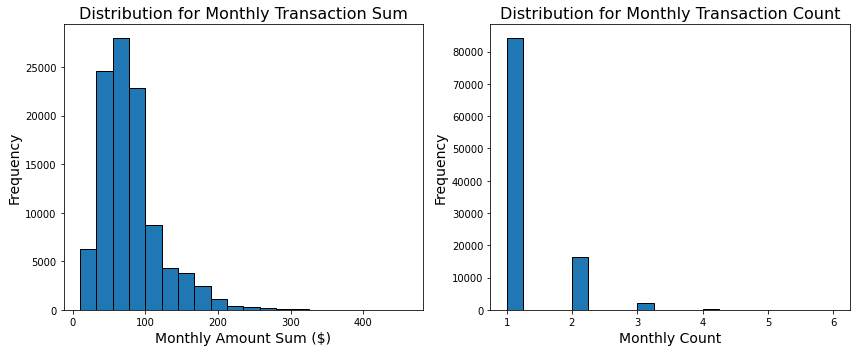

In [0]:
# Converting the PySpark DataFrame to a Pandas DataFrame.
clnt_monthly_aggregations_pd = clnt_monthly_aggregations.toPandas()

# Creating a figure with two subplots.
fig = plt.figure(figsize=(12, 5))
# Visualizing the distribution for the Monthly Transaction Amount Total.
sub1 = fig.add_subplot(121)
plt.hist(clnt_monthly_aggregations_pd["mth_txn_amt_sum"], bins=20, edgecolor='black')
sub1.set_title("Distribution for Monthly Transaction Sum", fontsize=16)
plt.xlabel("Monthly Amount Sum ($)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
# Visualizing the distribution for the Monthly Transaction Count.
sub2 = fig.add_subplot(122)
plt.hist(clnt_monthly_aggregations_pd["mth_txn_cnt"], bins=20, edgecolor='black')
sub2.set_title("Distribution for Monthly Transaction Count", fontsize=16)
plt.xlabel("Monthly Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

#### Answer:
- The monthly transaction pattern is comparable to the annual transaction pattern, with the majority of transactions falling below 100 dollars and just a small number exceeding 200 dollars. The most common value for the monthly transaction sum is 70 dollars and  more than 70% of clients only make one transaction each month, which is the most common monthly transaction frequency. Combining the two graphs will thus reveal that the data is highly irregular or out of balance. One, or one transaction each month, is unquestionably the most prevalent value for the count.

### Q 1.4.1.

In [0]:
# Extracting the unique customer_id values and converting to a NumPy array.
clnt_no = np.array(txn.select("customer_id").distinct().rdd.flatMap(lambda x: x).collect())
# Extracting the unique ME_DT values and converting to a NumPy array.
me_dt = np.array(txn.select("ME_DT").distinct().rdd.flatMap(lambda x: x).collect())
# Printing the number of unique clients and month-end dates.
print(f"Unique clients: {clnt_no.shape[0]}\nUnique month-end dates: {me_dt.shape[0]}")

Unique clients: 6889
Unique month-end dates: 47


### Q 1.4.2.

In [0]:
# Converting the reshaped arrays to PySpark DataFrames.
clnt_no = spark.createDataFrame(clnt_no.reshape(-1, 1).tolist(), ["customer_id"])
me_dt = spark.createDataFrame(me_dt.reshape(-1, 1) .tolist(), ["ME_DT"])
# Creating a Cartesian product of unique customer_id and ME_DT.
base_table = clnt_no.crossJoin(me_dt)

### Q 1.4.3.

In [0]:
# Renaming the "customer_id" column in the PySpark DataFrame.
base_table_sd = base_table.withColumnRenamed("customer_id", "CLNT_NO")
base_table_sd.show(5)

+-------+----------+
|CLNT_NO|     ME_DT|
+-------+----------+
| CS6001|2012-05-31|
| CS6001|2013-03-31|
| CS6001|2012-08-31|
| CS6001|2012-01-31|
| CS6001|2014-02-28|
+-------+----------+
only showing top 5 rows



### Q 1.4.4.

In [0]:
# Validating that the created table is what was originally wanted.
# Step 1: Filtering client CS1112 to confirm that the dates fall between the min and max month-dates.
cs1112_txn = base_table_sd.filter(base_table_sd["CLNT_NO"] == "CS1112")
cs1112_txn_min = cs1112_txn.select(min("ME_DT")).collect()[0][0]
cs1112_txn_max = cs1112_txn.select(max("ME_DT")).collect()[0][0]

print(f"CS1112 min date, {cs1112_txn_min}, is later than the txn min date, {txn_min}")
print(f"CS1112 max date, {cs1112_txn_max}, is the last day of the txn max date, {txn_max}")

CS1112 min date, 2011-05-31, is later than the txn min date, 2011-05-16
CS1112 max date, 2015-03-31, is the last day of the txn max date, 2015-03-16


In [0]:
# Viewing the month values in the snapshot of client CS1112.
base_table_sd.filter(base_table_sd["CLNT_NO"] == "CS1112").orderBy("ME_DT").show(5)

+-------+----------+
|CLNT_NO|     ME_DT|
+-------+----------+
| CS1112|2011-05-31|
| CS1112|2011-06-30|
| CS1112|2011-07-31|
| CS1112|2011-08-31|
| CS1112|2011-09-30|
+-------+----------+
only showing top 5 rows



In [0]:
# Confimring that the snapshot of CS1112 has 47 rows, one for each month.
cs1112_row_count = base_table_sd.filter(base_table_sd["CLNT_NO"] == "CS1112").orderBy("ME_DT").count()
print(f"The snapshot of CS1112 has {cs1112_row_count} rows for each month in the dataset.")

The snapshot of CS1112 has 47 rows for each month in the dataset.


In [0]:
# Step 2: Confirming the number of rows of the base table.
print(f"The Base table has {base_table_sd.count()} rows.")

The Base table has 323783 rows.


### Q 1.5.1.

In [0]:
# Renaming the 'customer_id' column to 'CLNT_NO' for the merge.
clnt_monthly_aggregations = clnt_monthly_aggregations.withColumnRenamed("customer_id", "CLNT_NO")
# Left-joining base_table_pd with clnt_monthly_aggregations on [CLNT_NO, ME_DT].
base_clnt_mth = base_table_sd.join(clnt_monthly_aggregations, on=["CLNT_NO", "ME_DT"], how="left")
base_clnt_mth.show(5)

+-------+----------+---------------+-----------+
|CLNT_NO|     ME_DT|mth_txn_amt_sum|mth_txn_cnt|
+-------+----------+---------------+-----------+
| CS6001|2012-05-31|           null|       null|
| CS6001|2013-03-31|           null|       null|
| CS6001|2012-08-31|             65|          1|
| CS6001|2012-01-31|           null|       null|
| CS6001|2014-02-28|             63|          1|
+-------+----------+---------------+-----------+
only showing top 5 rows



In [0]:
# Imputing the null values with 0.
base_clnt_mth = base_clnt_mth.fillna(0)
base_clnt_mth.show(5)

+-------+----------+---------------+-----------+
|CLNT_NO|     ME_DT|mth_txn_amt_sum|mth_txn_cnt|
+-------+----------+---------------+-----------+
| CS6001|2012-05-31|              0|          0|
| CS6001|2013-03-31|              0|          0|
| CS6001|2012-08-31|             65|          1|
| CS6001|2012-01-31|              0|          0|
| CS6001|2014-02-28|             63|          1|
+-------+----------+---------------+-----------+
only showing top 5 rows



In [0]:
# Confirming the number rows in base_clnt_mth.
print(f"base_clnt_mth has {base_clnt_mth.count()} rows.")

base_clnt_mth has 323783 rows.


#### Answer:
- Some rows have NaN values because clients have no transaction during those months. It is important to remember that the base_table_pd contains every possible combination of clients and dates while clnt_monthly_aggregations contains the actual data supplied. The NaN rows are effectively the difference.
- The NaN just indicates 0 amount sum and 0 count because there is no transaction made on those dates with missing values, thus  0 is imputed.
- There are exactly 323783 rows, which is the number of base_table_pd rows as expected.
- Unlike clnt_monthly_aggregation, which is a data collection with months containing transactions (non-zero), base_clnt_mth is a more comprehensive collection of client data by capturing all the months.

### Q 1.5.2.

In [0]:
# Sorting the DataFrame by 'CLNT_NO' and 'ME_DT' in ascending order.
base_clnt_mth = base_clnt_mth.orderBy("CLNT_NO", "ME_DT")
base_clnt_mth.show(5)

+-------+----------+---------------+-----------+
|CLNT_NO|     ME_DT|mth_txn_amt_sum|mth_txn_cnt|
+-------+----------+---------------+-----------+
| CS1112|2011-05-31|              0|          0|
| CS1112|2011-06-30|             56|          1|
| CS1112|2011-07-31|              0|          0|
| CS1112|2011-08-31|             96|          1|
| CS1112|2011-09-30|              0|          0|
+-------+----------+---------------+-----------+
only showing top 5 rows



### Q 1.5.3.

In [0]:
# Defining a function that calculates rolling window for a given window size in months.
def calculate_rolling_features(df, clnt_col, date_col, amt_col, cnt_col, window_size):
    # Defining the window specification.
    window_spec = Window.partitionBy(clnt_col) \
                        .orderBy(date_col) \
                        .rowsBetween(-(window_size - 1), 0)  # Current row and (window_size - 1) preceding rows
    # Calculating the rolling features.
    rolling_df = df.withColumn(
        f"{amt_col}_sum_{window_size}M",
        when(count(col(amt_col)).over(window_spec) == window_size, sum(col(amt_col)).over(window_spec))) \
    .withColumn(
        f"{amt_col}_mean_{window_size}M",
        when(count(col(amt_col)).over(window_spec) == window_size, mean(col(amt_col)).over(window_spec))) \
    .withColumn(
        f"{amt_col}_max_{window_size}M",
        when(count(col(amt_col)).over(window_spec) == window_size, max(col(amt_col)).over(window_spec))) \
    .withColumn(
        f"{cnt_col}_sum_{window_size}M",
        when(count(col(cnt_col)).over(window_spec) == window_size, sum(col(cnt_col)).over(window_spec))) \
    .withColumn(
        f"{cnt_col}_mean_{window_size}M",
        when(count(col(cnt_col)).over(window_spec) == window_size, mean(col(cnt_col)).over(window_spec))) \
    .withColumn(
        f"{cnt_col}_max_{window_size}M",
        when(count(col(cnt_col)).over(window_spec) == window_size, max(col(cnt_col)).over(window_spec)))
    # Dropping the original unneeded columns.
    rolling_df = rolling_df.drop(amt_col, cnt_col).orderBy(clnt_col, date_col)
    return rolling_df

In [0]:
# Calculating the 3-month rolling window features.
rolling_features_3M = calculate_rolling_features(base_clnt_mth,
                                                 clnt_col="CLNT_NO",
                                                 date_col="ME_DT",
                                                 amt_col="mth_txn_amt_sum",
                                                 cnt_col="mth_txn_cnt",
                                                 window_size=3)
rolling_features_3M.show(5)

+-------+----------+----------------------+-----------------------+----------------------+------------------+-------------------+------------------+
|CLNT_NO|     ME_DT|mth_txn_amt_sum_sum_3M|mth_txn_amt_sum_mean_3M|mth_txn_amt_sum_max_3M|mth_txn_cnt_sum_3M|mth_txn_cnt_mean_3M|mth_txn_cnt_max_3M|
+-------+----------+----------------------+-----------------------+----------------------+------------------+-------------------+------------------+
| CS1112|2011-05-31|                  null|                   null|                  null|              null|               null|              null|
| CS1112|2011-06-30|                  null|                   null|                  null|              null|               null|              null|
| CS1112|2011-07-31|                    56|     18.666666666666668|                    56|                 1| 0.3333333333333333|                 1|
| CS1112|2011-08-31|                   152|     50.666666666666664|                    96|                

In [0]:
# Calculating the 6-month rolling window features.
rolling_features_6M = calculate_rolling_features(base_clnt_mth,
                                                 clnt_col="CLNT_NO",
                                                 date_col="ME_DT",
                                                 amt_col="mth_txn_amt_sum",
                                                 cnt_col="mth_txn_cnt",
                                                 window_size=6)
rolling_features_6M.show(10)

+-------+----------+----------------------+-----------------------+----------------------+------------------+-------------------+------------------+
|CLNT_NO|     ME_DT|mth_txn_amt_sum_sum_6M|mth_txn_amt_sum_mean_6M|mth_txn_amt_sum_max_6M|mth_txn_cnt_sum_6M|mth_txn_cnt_mean_6M|mth_txn_cnt_max_6M|
+-------+----------+----------------------+-----------------------+----------------------+------------------+-------------------+------------------+
| CS1112|2011-05-31|                  null|                   null|                  null|              null|               null|              null|
| CS1112|2011-06-30|                  null|                   null|                  null|              null|               null|              null|
| CS1112|2011-07-31|                  null|                   null|                  null|              null|               null|              null|
| CS1112|2011-08-31|                  null|                   null|                  null|              nu

In [0]:
# Calculating the 12-month rolling window features.
rolling_features_12M = calculate_rolling_features(base_clnt_mth,
                                                 clnt_col="CLNT_NO",
                                                 date_col="ME_DT",
                                                 amt_col="mth_txn_amt_sum",
                                                 cnt_col="mth_txn_cnt",
                                                 window_size=12)
rolling_features_12M.show(15)

+-------+----------+-----------------------+------------------------+-----------------------+-------------------+--------------------+-------------------+
|CLNT_NO|     ME_DT|mth_txn_amt_sum_sum_12M|mth_txn_amt_sum_mean_12M|mth_txn_amt_sum_max_12M|mth_txn_cnt_sum_12M|mth_txn_cnt_mean_12M|mth_txn_cnt_max_12M|
+-------+----------+-----------------------+------------------------+-----------------------+-------------------+--------------------+-------------------+
| CS1112|2011-05-31|                   null|                    null|                   null|               null|                null|               null|
| CS1112|2011-06-30|                   null|                    null|                   null|               null|                null|               null|
| CS1112|2011-07-31|                   null|                    null|                   null|               null|                null|               null|
| CS1112|2011-08-31|                   null|                    null| 

#### Answer:
- There are 2, 5 and 11 (following an n-1 series) rows that appear with NaN values at the beginning of the 3, 6, and 12-month windows, respectively. These numbers can also be observed in the snapshots of the tables shown above. These NaN values appear because, depending on its size, the window will not fit in at the beginning because the calculation is to obtain statistics from the previous n months. 
- The index has 1 level and the column has 1 level therefore these dataframes are single-indexed. In PySpark, DataFrames don't have the concept of "index levels" or "column levels" in the same way Pandas does. PySpark DataFrames are more like relational tables, where columns are flat and there is no hierarchical index.

In [0]:
# Renaming the columns for rolling_features_3M.
rolling_features_3M = rolling_features_3M.withColumnRenamed("mth_txn_amt_sum_sum_3M", "amt_sum_3M") \
                                       .withColumnRenamed("mth_txn_amt_sum_mean_3M", "amt_mean_3M") \
                                       .withColumnRenamed("mth_txn_amt_sum_max_3M", "amt_max_3M") \
                                       .withColumnRenamed("mth_txn_cnt_sum_3M", "txn_cnt_sum_3M") \
                                       .withColumnRenamed("mth_txn_cnt_mean_3M", "txn_cnt_mean_3M") \
                                       .withColumnRenamed("mth_txn_cnt_max_3M", "txn_cnt_max_3M")
# Renaming the columns for rolling_features_6M.
rolling_features_6M = rolling_features_6M.withColumnRenamed("mth_txn_amt_sum_sum_6M", "amt_sum_6M") \
                                       .withColumnRenamed("mth_txn_amt_sum_mean_6M", "amt_mean_6M") \
                                       .withColumnRenamed("mth_txn_amt_sum_max_6M", "amt_max_6M") \
                                       .withColumnRenamed("mth_txn_cnt_sum_6M", "txn_cnt_sum_6M") \
                                       .withColumnRenamed("mth_txn_cnt_mean_6M", "txn_cnt_mean_6M") \
                                       .withColumnRenamed("mth_txn_cnt_max_6M", "txn_cnt_max_6M")
# Renaming the columns for rolling_features_12M.
rolling_features_12M = rolling_features_12M.withColumnRenamed("mth_txn_amt_sum_sum_12M", "amt_sum_12M") \
                                         .withColumnRenamed("mth_txn_amt_sum_mean_12M", "amt_mean_12M") \
                                         .withColumnRenamed("mth_txn_amt_sum_max_12M", "amt_max_12M") \
                                         .withColumnRenamed("mth_txn_cnt_sum_12M", "txn_cnt_sum_12M") \
                                         .withColumnRenamed("mth_txn_cnt_mean_12M", "txn_cnt_mean_12M") \
                                         .withColumnRenamed("mth_txn_cnt_max_12M", "txn_cnt_max_12M")

In [0]:
# Confirming the new column names.
print(f"rolling_features_3M columns:\n{rolling_features_3M.columns}")
print(f"rolling_features_6M columns:\n{rolling_features_6M.columns}")
print(f"rolling_features_12M columns:\n{rolling_features_12M.columns}")

rolling_features_3M columns:
['CLNT_NO', 'ME_DT', 'amt_sum_3M', 'amt_mean_3M', 'amt_max_3M', 'txn_cnt_sum_3M', 'txn_cnt_mean_3M', 'txn_cnt_max_3M']
rolling_features_6M columns:
['CLNT_NO', 'ME_DT', 'amt_sum_6M', 'amt_mean_6M', 'amt_max_6M', 'txn_cnt_sum_6M', 'txn_cnt_mean_6M', 'txn_cnt_max_6M']
rolling_features_12M columns:
['CLNT_NO', 'ME_DT', 'amt_sum_12M', 'amt_mean_12M', 'amt_max_12M', 'txn_cnt_sum_12M', 'txn_cnt_mean_12M', 'txn_cnt_max_12M']


### Q 1.5.4.

In [0]:
# Joining all rolling features with base_clnt_mth on CLNT_NO and ME_DT then ordering by those columns.
all_rolling_features = base_clnt_mth.join(rolling_features_3M, on=["CLNT_NO", "ME_DT"], how="left") \
                                   .join(rolling_features_6M, on=["CLNT_NO", "ME_DT"], how="left") \
                                   .join(rolling_features_12M, on=["CLNT_NO", "ME_DT"], how="left") \
                                   .orderBy("CLNT_NO", "ME_DT")
all_rolling_features.show(5)

+-------+----------+---------------+-----------+----------+------------------+----------+--------------+------------------+--------------+----------+-----------+----------+--------------+---------------+--------------+-----------+------------+-----------+---------------+----------------+---------------+
|CLNT_NO|     ME_DT|mth_txn_amt_sum|mth_txn_cnt|amt_sum_3M|       amt_mean_3M|amt_max_3M|txn_cnt_sum_3M|   txn_cnt_mean_3M|txn_cnt_max_3M|amt_sum_6M|amt_mean_6M|amt_max_6M|txn_cnt_sum_6M|txn_cnt_mean_6M|txn_cnt_max_6M|amt_sum_12M|amt_mean_12M|amt_max_12M|txn_cnt_sum_12M|txn_cnt_mean_12M|txn_cnt_max_12M|
+-------+----------+---------------+-----------+----------+------------------+----------+--------------+------------------+--------------+----------+-----------+----------+--------------+---------------+--------------+-----------+------------+-----------+---------------+----------------+---------------+
| CS1112|2011-05-31|              0|          0|      null|              null|      n

#### Comment (Understanding of join method):
- In Pandas, the index (including CLNT_NO and ME_DT) is used to align rows during concatenation. However, in PySpark, the columns CLNT_NO and ME_DT are explicitly used as join keys to align rows as executed in this notebook because PySpark has no explicit index (rows are identified by data).

### Q 1.5.5.

In [0]:
# Confirming the number of rows and columns in all_rolling_features.
print(f"all_rolling_features has {all_rolling_features.count()} rows and {len(all_rolling_features.columns)} columns.")

all_rolling_features has 323783 rows and 22 columns.


In [0]:
# Converting the PySpark DataFrame to a Pandas DataFrame.
all_rolling_features_pd = all_rolling_features.toPandas()
# Saving the Pandas DataFrame as an Excel file locally.
local_excel_path = "/tmp/mth_rolling_features.xlsx"  # Temporary local path
all_rolling_features_pd.to_excel(local_excel_path, index=False)
# Moving the Excel file to DBFS for easy access via the GUI.
dbfs_excel_path = "dbfs:/FileStore/mth_rolling_features.xlsx"  # DBFS path
dbutils.fs.mv(f"file:{local_excel_path}", dbfs_excel_path)

print(f"Excel file saved to DBFS: {dbfs_excel_path}")

Excel file saved to DBFS: dbfs:/FileStore/mth_rolling_features.xlsx


In [0]:
# Observing a snapshot of the saved DataFrame.
all_rolling_features_pd.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
0,CS1112,2011-05-31,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CS1112,2011-06-30,56,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Q 1.6.1.

In [0]:
# Extracting the day of the week (Monday=0, Sunday=6) and day name.
txn = txn.withColumn("day_of_the_week", (dayofweek("txn_date") + 5) % 7) \
         .withColumn("day_name", date_format("txn_date", "EEEE"))
txn.show(4)

+-----------+-----------+----------+----------+----+---------------+---------+
|customer_id|tran_amount|  txn_date|     ME_DT|YEAR|day_of_the_week| day_name|
+-----------+-----------+----------+----------+----+---------------+---------+
|     CS5295|         35|2013-02-11|2013-02-28|2013|              0|   Monday|
|     CS4768|         39|2015-03-15|2015-03-31|2015|              6|   Sunday|
|     CS2122|         52|2013-02-26|2013-02-28|2013|              1|  Tuesday|
|     CS1217|         99|2011-11-16|2011-11-30|2011|              2|Wednesday|
+-----------+-----------+----------+----------+----+---------------+---------+
only showing top 4 rows



### Q 1.6.2.

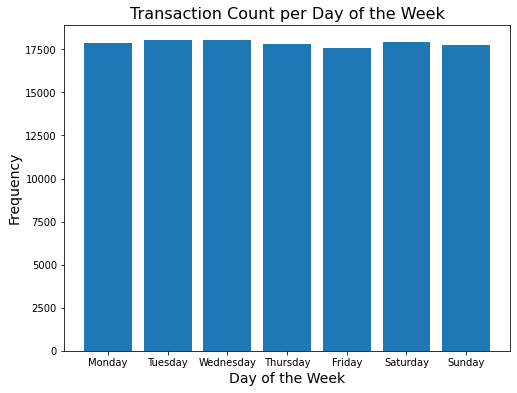

In [0]:
# Aggregating the data to get the count of transactions per day of the week.
txn_count_per_day = txn.groupBy("day_of_the_week").count().orderBy("day_of_the_week")

# Converting the result to a Pandas DataFrame for visualizing.
txn_count_per_day_pd = txn_count_per_day.toPandas()

# Visualizing the bar plot that shows the count of transactions per day of the week.
plt.figure(figsize=(8, 6))
plt.bar(txn_count_per_day_pd["day_of_the_week"], txn_count_per_day_pd["count"])
plt.title("Transaction Count per Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(ticks=range(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Q 1.6.3.

In [0]:
# Generating the features that capture the count of transactions per client, year and day of the week.
clnt_daily_aggregations = txn.groupBy("customer_id", "YEAR", "day_name") \
                             .agg(count("tran_amount").alias("cnt"))\
                             .orderBy("customer_id", "YEAR", "day_name")
clnt_daily_aggregations.show(5)

+-----------+----+---------+---+
|customer_id|YEAR| day_name|cnt|
+-----------+----+---------+---+
|     CS1112|2011|   Friday|  1|
|     CS1112|2011|   Sunday|  1|
|     CS1112|2011|Wednesday|  1|
|     CS1112|2012| Saturday|  1|
|     CS1112|2012|   Sunday|  3|
+-----------+----+---------+---+
only showing top 5 rows



In [0]:
# Creating a composite column combining YEAR and day_name.
clnt_daily_aggregations = clnt_daily_aggregations.withColumn(
    "YEAR_day_name", concat_ws("_", "YEAR", "day_name"))

# Pivoting on the composite column and Imputing 0 to NaN columns.
clnt_daily_aggregations_pivot = clnt_daily_aggregations.groupBy("customer_id") \
                                                       .pivot("YEAR_day_name") \
                                                       .agg({"cnt": "first"}) \
                                                       .orderBy("customer_id") \
                                                       .fillna(0)
clnt_daily_aggregations_pivot.show(5)

+-----------+-----------+-----------+-------------+-----------+-------------+------------+--------------+-----------+-----------+-------------+-----------+-------------+------------+--------------+-----------+-----------+-------------+-----------+-------------+------------+--------------+-----------+-----------+-------------+-----------+-------------+------------+--------------+-----------+-----------+-------------+-----------+-------------+------------+--------------+
|customer_id|2011_Friday|2011_Monday|2011_Saturday|2011_Sunday|2011_Thursday|2011_Tuesday|2011_Wednesday|2012_Friday|2012_Monday|2012_Saturday|2012_Sunday|2012_Thursday|2012_Tuesday|2012_Wednesday|2013_Friday|2013_Monday|2013_Saturday|2013_Sunday|2013_Thursday|2013_Tuesday|2013_Wednesday|2014_Friday|2014_Monday|2014_Saturday|2014_Sunday|2014_Thursday|2014_Tuesday|2014_Wednesday|2015_Friday|2015_Monday|2015_Saturday|2015_Sunday|2015_Thursday|2015_Tuesday|2015_Wednesday|
+-----------+-----------+-----------+-------------+-

In [0]:
# Adding the "cnt_" prefix to all pivoted columns.
columns_daily_to_rename = [col for col in clnt_daily_aggregations_pivot.columns if col != "customer_id"]
# Renaming the columns.
for col in columns_daily_to_rename:
    clnt_daily_aggregations_pivot = clnt_daily_aggregations_pivot.withColumnRenamed(col, f"cnt_{col}")
clnt_daily_aggregations_pivot.show(5)

+-----------+---------------+---------------+-----------------+---------------+-----------------+----------------+------------------+---------------+---------------+-----------------+---------------+-----------------+----------------+------------------+---------------+---------------+-----------------+---------------+-----------------+----------------+------------------+---------------+---------------+-----------------+---------------+-----------------+----------------+------------------+---------------+---------------+-----------------+---------------+-----------------+----------------+------------------+
|customer_id|cnt_2011_Friday|cnt_2011_Monday|cnt_2011_Saturday|cnt_2011_Sunday|cnt_2011_Thursday|cnt_2011_Tuesday|cnt_2011_Wednesday|cnt_2012_Friday|cnt_2012_Monday|cnt_2012_Saturday|cnt_2012_Sunday|cnt_2012_Thursday|cnt_2012_Tuesday|cnt_2012_Wednesday|cnt_2013_Friday|cnt_2013_Monday|cnt_2013_Saturday|cnt_2013_Sunday|cnt_2013_Thursday|cnt_2013_Tuesday|cnt_2013_Wednesday|cnt_2014_Frid

### Q 1.6.4.

In [0]:
# Confirming that clnt_daily_aggregations_pivot has the same number of rows as clnt_annual_aggregations_pivot.
annual_row_count = clnt_annual_aggregations_pivot.count()
daily_row_count = clnt_daily_aggregations_pivot.count()

print(f"Annual row count: {annual_row_count}")
print(f"Daily row count: {daily_row_count}")
print(f"Do the row counts match? {annual_row_count == daily_row_count}")

Annual row count: 6889
Daily row count: 6889
Do the row counts match? True


In [0]:
# Converting the PySpark DataFrame to a Pandas DataFrame for saving.
clnt_daily_aggregations_pivot_pd = clnt_daily_aggregations_pivot.toPandas()
# Saving the Pandas DataFrame as an Excel file locally.
local_excel_path = "/tmp/annual_day_of_week_counts_pivot.xlsx"  # Temporary local path
clnt_daily_aggregations_pivot_pd.to_excel(local_excel_path, index=False)
# Moving the Excel file to DBFS for easy access via the GUI.
dbfs_excel_path = "dbfs:/FileStore/annual_day_of_week_counts_pivot.xlsx"  # DBFS path
dbutils.fs.mv(f"file:{local_excel_path}", dbfs_excel_path)

print(f"Excel file saved to DBFS: {dbfs_excel_path}")

Excel file saved to DBFS: dbfs:/FileStore/annual_day_of_week_counts_pivot.xlsx


In [0]:
# Viewing a snapshot of the saved dataframe.
clnt_daily_aggregations_pivot_pd.head()

,customer_id,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
0,CS1112,1,0,0,1,0,0,1,0,0,...,1,1,1,0,0,0,0,0,0,1
1,CS1113,1,1,0,1,0,0,0,2,1,...,0,3,0,0,2,0,0,0,0,1
2,CS1114,0,1,0,1,1,0,2,0,0,...,0,1,1,0,0,0,0,1,0,0
3,CS1115,0,0,1,1,0,0,1,1,1,...,2,0,2,0,0,0,0,1,0,0
4,CS1116,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
# Extracting the number features in the dataframe.
print(f"The number of features in the DataFrame is: {len(clnt_daily_aggregations_pivot.columns) -1}")

The number of features in the DataFrame is: 35


#### Answer:
- The output has 6889 rows, which is the same number as the clnt_annual_aggregations_pivot.
- 35 features/columns were created in this section as a result of having 5 years of range (from the year 2011 to the year 2015) and 7 days of the week, therefore we have 5 * 7, or 35 features.

### Q 1.6.5.

In [0]:
# Generating the features that capture the count of transactions per client, month-end-date and day of the week.
clnt_monthly_day_aggregations = txn.groupBy("customer_id", "ME_DT", "day_name") \
                                   .agg(count("tran_amount").alias("cnt")) \
                                   .orderBy("customer_id", "ME_DT", "day_name")
clnt_monthly_day_aggregations.show(5)

+-----------+----------+---------+---+
|customer_id|     ME_DT| day_name|cnt|
+-----------+----------+---------+---+
|     CS1112|2011-06-30|Wednesday|  1|
|     CS1112|2011-08-31|   Friday|  1|
|     CS1112|2011-10-31|   Sunday|  1|
|     CS1112|2012-04-30|   Sunday|  1|
|     CS1112|2012-06-30|   Sunday|  1|
+-----------+----------+---------+---+
only showing top 5 rows



In [0]:
# Pivoting on the composite column and Imputing 0 to NaN columns.
clnt_monthly_day_aggregations_pivot = clnt_monthly_day_aggregations.groupBy("customer_id", "ME_DT") \
                                                                   .pivot("day_name") \
                                                                   .agg({"cnt": "first"}) \
                                                                   .orderBy("customer_id", "ME_DT") \
                                                                   .fillna(0)
clnt_monthly_day_aggregations_pivot.show(5)

+-----------+----------+------+------+--------+------+--------+-------+---------+
|customer_id|     ME_DT|Friday|Monday|Saturday|Sunday|Thursday|Tuesday|Wednesday|
+-----------+----------+------+------+--------+------+--------+-------+---------+
|     CS1112|2011-06-30|     0|     0|       0|     0|       0|      0|        1|
|     CS1112|2011-08-31|     1|     0|       0|     0|       0|      0|        0|
|     CS1112|2011-10-31|     0|     0|       0|     1|       0|      0|        0|
|     CS1112|2012-04-30|     0|     0|       0|     1|       0|      0|        0|
|     CS1112|2012-06-30|     0|     0|       0|     1|       0|      0|        0|
+-----------+----------+------+------+--------+------+--------+-------+---------+
only showing top 5 rows



In [0]:
# Adding the "cnt_" prefix to all pivoted columns.
columns_monthly_to_rename = [col for col in clnt_monthly_day_aggregations_pivot \
    .columns if col not in ["customer_id", "ME_DT"]]
# Renaming the columns.
for col in columns_monthly_to_rename:
    clnt_monthly_day_aggregations_pivot = clnt_monthly_day_aggregations_pivot \
        .withColumnRenamed(col, f"cnt_{col}")
clnt_monthly_day_aggregations_pivot.show(5)

+-----------+----------+----------+----------+------------+----------+------------+-----------+-------------+
|customer_id|     ME_DT|cnt_Friday|cnt_Monday|cnt_Saturday|cnt_Sunday|cnt_Thursday|cnt_Tuesday|cnt_Wednesday|
+-----------+----------+----------+----------+------------+----------+------------+-----------+-------------+
|     CS1112|2011-06-30|         0|         0|           0|         0|           0|          0|            1|
|     CS1112|2011-08-31|         1|         0|           0|         0|           0|          0|            0|
|     CS1112|2011-10-31|         0|         0|           0|         1|           0|          0|            0|
|     CS1112|2012-04-30|         0|         0|           0|         1|           0|          0|            0|
|     CS1112|2012-06-30|         0|         0|           0|         1|           0|          0|            0|
+-----------+----------+----------+----------+------------+----------+------------+-----------+-------------+
only showi

### Q 1.6.6.

In [0]:
# Renaming the 'customer_id' column to 'CLNT_NO' for the merge.
clnt_monthly_day_aggregations_pivot = clnt_monthly_day_aggregations_pivot \
  .withColumnRenamed("customer_id", "CLNT_NO")
# Left-joining base_table_pd with base_clnt_mth_day on [CLNT_NO, ME_DT].
base_clnt_mth_day = base_table_sd.join(clnt_monthly_day_aggregations_pivot,on=["CLNT_NO","ME_DT"], how="left") \
                                 .fillna(0) \
                                 .orderBy("CLNT_NO", "ME_DT")
base_clnt_mth_day.show(5)

+-------+----------+----------+----------+------------+----------+------------+-----------+-------------+
|CLNT_NO|     ME_DT|cnt_Friday|cnt_Monday|cnt_Saturday|cnt_Sunday|cnt_Thursday|cnt_Tuesday|cnt_Wednesday|
+-------+----------+----------+----------+------------+----------+------------+-----------+-------------+
| CS1112|2011-05-31|         0|         0|           0|         0|           0|          0|            0|
| CS1112|2011-06-30|         0|         0|           0|         0|           0|          0|            1|
| CS1112|2011-07-31|         0|         0|           0|         0|           0|          0|            0|
| CS1112|2011-08-31|         1|         0|           0|         0|           0|          0|            0|
| CS1112|2011-09-30|         0|         0|           0|         0|           0|          0|            0|
+-------+----------+----------+----------+------------+----------+------------+-----------+-------------+
only showing top 5 rows



In [0]:
# Converting the PySpark DataFrame to a Pandas DataFrame for saving.
base_clnt_mth_day_pd = base_clnt_mth_day.toPandas()
# Saving the Pandas DataFrame as an Excel file locally.
local_excel_path = "/tmp/mth_day_counts.xlsx"  # Temporary local path
base_clnt_mth_day_pd.to_excel(local_excel_path, index=False)
# Moving the Excel file to DBFS for easy access via the GUI.
dbfs_excel_path = "dbfs:/FileStore/mth_day_counts.xlsx"  # DBFS path
dbutils.fs.mv(f"file:{local_excel_path}", dbfs_excel_path)

print(f"Excel file saved to DBFS: {dbfs_excel_path}")

Excel file saved to DBFS: dbfs:/FileStore/mth_day_counts.xlsx


In [0]:
# Viewing a snapshot of the saved DataFrame.
base_clnt_mth_day_pd.head()

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS1112,2011-05-31,0,0,0,0,0,0,0
1,CS1112,2011-06-30,0,0,0,0,0,0,1
2,CS1112,2011-07-31,0,0,0,0,0,0,0
3,CS1112,2011-08-31,1,0,0,0,0,0,0
4,CS1112,2011-09-30,0,0,0,0,0,0,0


### Q 1.7.1.

In [0]:
# Creating the table last_monthly_purchase that captures the last 'txn_date' for every client and month.
last_monthly_purchase = txn.groupBy("customer_id", "ME_DT") \
                           .agg(max("txn_date").alias("txn_date")) \
                           .orderBy("customer_id", "ME_DT")
last_monthly_purchase.show(5)

+-----------+----------+----------+
|customer_id|     ME_DT|  txn_date|
+-----------+----------+----------+
|     CS1112|2011-06-30|2011-06-15|
|     CS1112|2011-08-31|2011-08-19|
|     CS1112|2011-10-31|2011-10-02|
|     CS1112|2012-04-30|2012-04-08|
|     CS1112|2012-06-30|2012-06-24|
+-----------+----------+----------+
only showing top 5 rows



### Q 1.7.2.

In [0]:
# Renaming the 'customer_id' column to 'CLNT_NO' for the merge.
last_monthly_purchase = last_monthly_purchase.withColumnRenamed("customer_id", "CLNT_NO")
# Left-joining base_table_pd with last_monthly_purchase_base on [CLNT_NO, ME_DT].
last_monthly_purchase_base = base_table_sd.join(last_monthly_purchase, on=["CLNT_NO", "ME_DT"], how="left")
# Sorting the data first by 'CLNT_NO' and then by 'ME_DT' in ascending order.
last_monthly_purchase_base = last_monthly_purchase_base.orderBy("CLNT_NO", "ME_DT")
last_monthly_purchase_base.show(8)

+-------+----------+----------+
|CLNT_NO|     ME_DT|  txn_date|
+-------+----------+----------+
| CS1112|2011-05-31|      null|
| CS1112|2011-06-30|2011-06-15|
| CS1112|2011-07-31|      null|
| CS1112|2011-08-31|2011-08-19|
| CS1112|2011-09-30|      null|
| CS1112|2011-10-31|2011-10-02|
| CS1112|2011-11-30|      null|
| CS1112|2011-12-31|      null|
+-------+----------+----------+
only showing top 8 rows



#### Answer:
- Before reading the solution to the NaT (Not a Timestamp but shows as Null in PySpark) imputation solution, I figured the best values for imputuation would be the last known date the client made a transaction for every month following until a new transaction is made. 

### Q 1.7.3.

In [0]:
from pyspark.sql import Window
from pyspark.sql.functions import col, last

# Defining a window specification.
window_spec = Window.partitionBy("CLNT_NO").orderBy("ME_DT") \
    .rowsBetween(Window.unboundedPreceding, Window.currentRow)
# Forward-filling missing values within each group.
last_monthly_purchase_base = last_monthly_purchase_base.select("CLNT_NO", "ME_DT",
    *[last(col(column), ignorenulls=True).over(window_spec).alias(column) for column in last_monthly_purchase_base.columns if column not in ["CLNT_NO", "ME_DT"]]) \
    .orderBy("CLNT_NO", "ME_DT")
last_monthly_purchase_base.show(98)

+-------+----------+----------+
|CLNT_NO|     ME_DT|  txn_date|
+-------+----------+----------+
| CS1112|2011-05-31|      null|
| CS1112|2011-06-30|2011-06-15|
| CS1112|2011-07-31|2011-06-15|
| CS1112|2011-08-31|2011-08-19|
| CS1112|2011-09-30|2011-08-19|
| CS1112|2011-10-31|2011-10-02|
| CS1112|2011-11-30|2011-10-02|
| CS1112|2011-12-31|2011-10-02|
| CS1112|2012-01-31|2011-10-02|
| CS1112|2012-02-29|2011-10-02|
| CS1112|2012-03-31|2011-10-02|
| CS1112|2012-04-30|2012-04-08|
| CS1112|2012-05-31|2012-04-08|
| CS1112|2012-06-30|2012-06-24|
| CS1112|2012-07-31|2012-07-03|
| CS1112|2012-08-31|2012-07-03|
| CS1112|2012-09-30|2012-09-16|
| CS1112|2012-10-31|2012-09-16|
| CS1112|2012-11-30|2012-09-16|
| CS1112|2012-12-31|2012-12-15|
| CS1112|2013-01-31|2012-12-15|
| CS1112|2013-02-28|2012-12-15|
| CS1112|2013-03-31|2013-03-01|
| CS1112|2013-04-30|2013-03-01|
| CS1112|2013-05-31|2013-03-01|
| CS1112|2013-06-30|2013-03-01|
| CS1112|2013-07-31|2013-07-01|
| CS1112|2013-08-31|2013-07-01|
| CS1112

### Q 1.7.4.

In [0]:
# Calculating the difference in days between ME_DT and txn_date.
last_monthly_purchase_base = last_monthly_purchase_base.withColumn("days_since_last_txn", 
                                                                   datediff(col("ME_DT"), col("txn_date")))
last_monthly_purchase_base.show(5)

+-------+----------+----------+-------------------+
|CLNT_NO|     ME_DT|  txn_date|days_since_last_txn|
+-------+----------+----------+-------------------+
| CS1112|2011-05-31|      null|               null|
| CS1112|2011-06-30|2011-06-15|                 15|
| CS1112|2011-07-31|2011-06-15|                 46|
| CS1112|2011-08-31|2011-08-19|                 12|
| CS1112|2011-09-30|2011-08-19|                 42|
+-------+----------+----------+-------------------+
only showing top 5 rows



### Q 1.7.5.

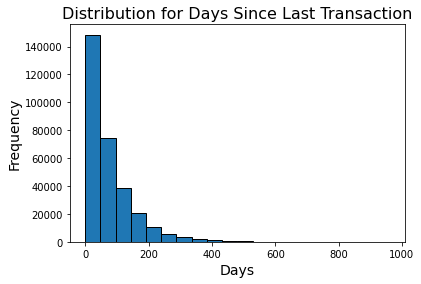

In [0]:
# Converting the PySpark DataFrame to a Pandas DataFrame.
last_monthly_purchase_base_pd = last_monthly_purchase_base.select("days_since_last_txn").toPandas()

# Visualizing a histogram of the 'days_since_last_txn'.
plt.hist(last_monthly_purchase_base_pd["days_since_last_txn"], bins=20, edgecolor="black")
plt.title("Distribution for Days Since Last Transaction", fontsize=16)
plt.xlabel("Days", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

#### Answer:
- From the histogram, it can be observed that the more recent transactions have the highest frequency. The zeros in the data represent the most recent transactions and thus makes zero a  wrong choice value for imputation. However, a value is still required for imputuation of the NaN and a large-enough negative value, that cannot be obtained realistically, would be used as a placeholder indicating that the data is missing, and no transaction has occurred yet for those months. This would allow for easy observation of  the frequency for the initial months before a client makes a purchase. These values would appear to the left of the most recent transactions, almost like an exclusion from the right side of the distribution. Using a large positive value is also unideal as that value could very much be achieved in reality.

In [0]:
# Imputing the NaN values(-100).
last_monthly_purchase_base = last_monthly_purchase_base.fillna({"days_since_last_txn": -100})

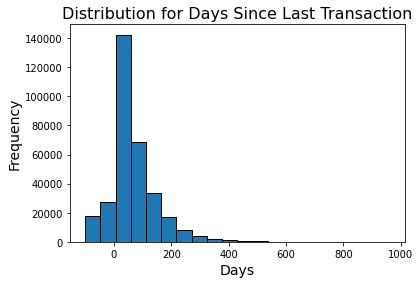

In [0]:
# Converting the PySpark DataFrame to a Pandas DataFrame.
last_monthly_purchase_base_pd = last_monthly_purchase_base.select("days_since_last_txn").toPandas()

# Visualizing a histogram of the 'days_since_last_txn'.
plt.hist(last_monthly_purchase_base_pd["days_since_last_txn"], bins=20, edgecolor="black")
plt.title("Distribution for Days Since Last Transaction", fontsize=16)
plt.xlabel("Days", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

In [0]:
# Reviewing the snapshot of the the transition between clients CS1113 and CS1114 after imputation.
last_monthly_purchase_base.show(98)

+-------+----------+----------+-------------------+
|CLNT_NO|     ME_DT|  txn_date|days_since_last_txn|
+-------+----------+----------+-------------------+
| CS1112|2011-05-31|      null|               -100|
| CS1112|2011-06-30|2011-06-15|                 15|
| CS1112|2011-07-31|2011-06-15|                 46|
| CS1112|2011-08-31|2011-08-19|                 12|
| CS1112|2011-09-30|2011-08-19|                 42|
| CS1112|2011-10-31|2011-10-02|                 29|
| CS1112|2011-11-30|2011-10-02|                 59|
| CS1112|2011-12-31|2011-10-02|                 90|
| CS1112|2012-01-31|2011-10-02|                121|
| CS1112|2012-02-29|2011-10-02|                150|
| CS1112|2012-03-31|2011-10-02|                181|
| CS1112|2012-04-30|2012-04-08|                 22|
| CS1112|2012-05-31|2012-04-08|                 53|
| CS1112|2012-06-30|2012-06-24|                  6|
| CS1112|2012-07-31|2012-07-03|                 28|
| CS1112|2012-08-31|2012-07-03|                 59|
| CS1112|201

In [0]:
# Converting the PySpark DataFrame to a Pandas DataFrame.
last_monthly_purchase_base_pd = last_monthly_purchase_base.select("CLNT_NO", "ME_DT", "days_since_last_txn").toPandas()
# Saving the Pandas DataFrame as an Excel file locally.
local_excel_path = "/tmp/days_since_last_txn.xlsx"  # Temporary local path
last_monthly_purchase_base_pd.to_excel(local_excel_path, index=False)
# Moving the Excel file to DBFS for easy access via the GUI.
dbfs_excel_path = "dbfs:/FileStore/days_since_last_txn.xlsx"  # DBFS path
dbutils.fs.mv(f"file:{local_excel_path}", dbfs_excel_path)

print(f"Excel file saved to DBFS: {dbfs_excel_path}")

Excel file saved to DBFS: dbfs:/FileStore/days_since_last_txn.xlsx


In [0]:
# Viewing a snapshot of the saved DataFrame.
last_monthly_purchase_base_pd.head()

,CLNT_NO,ME_DT,days_since_last_txn
0,CS1112,2011-05-31,-100
1,CS1112,2011-06-30,15
2,CS1112,2011-07-31,46
3,CS1112,2011-08-31,12
4,CS1112,2011-09-30,42


In [0]:
# Viewing the List of files in the DBFS FileStore directory.
display(dbutils.fs.ls("dbfs:/FileStore/"))

path,name,size,modificationTime
dbfs:/FileStore/annual_day_of_week_counts_pivot.xlsx,annual_day_of_week_counts_pivot.xlsx,685703,1742715726000
dbfs:/FileStore/annual_features.xlsx,annual_features.xlsx,1767051,1742715417000
dbfs:/FileStore/days_since_last_txn.xlsx,days_since_last_txn.xlsx,5434349,1742715920000
dbfs:/FileStore/mth_day_counts.xlsx,mth_day_counts.xlsx,9124850,1742715820000
dbfs:/FileStore/mth_rolling_features.xlsx,mth_rolling_features.xlsx,26562186,1742715697000
dbfs:/FileStore/shared_uploads/,shared_uploads/,0,0
dbfs:/FileStore/tables/,tables/,0,0


In [0]:
import os
print(f"Files will be downloaded to: {os.getcwd()}")

Files will be downloaded to: /databricks/driver


In [0]:
import requests

# List of file URLs to download
file_urls = [
    "https://community.cloud.databricks.com/files/annual_features.xlsx",
    "https://community.cloud.databricks.com/files/mth_rolling_features.xlsx",
    "https://community.cloud.databricks.com/files/annual_day_of_week_counts_pivot.xlsx",
    "https://community.cloud.databricks.com/files/mth_day_counts.xlsx",
    "https://community.cloud.databricks.com/files/days_since_last_txn.xlsx"
]

# Download each file
for url in file_urls:
    file_name = url.split("/")[-1]  # Extract the file name from the URL
    response = requests.get(url)
    if response.status_code == 200:  # Check if the request was successful
        with open(file_name, "wb") as file:
            file.write(response.content)
        print(f"Downloaded: {file_name}")
    else:
        print(f"Failed to download: {file_name} (Status Code: {response.status_code})")

Downloaded: annual_features.xlsx
Downloaded: mth_rolling_features.xlsx
Downloaded: annual_day_of_week_counts_pivot.xlsx
Downloaded: mth_day_counts.xlsx
Downloaded: days_since_last_txn.xlsx
